In [3]:
%reload_ext autoreload
%autoreload 1
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
bs = 64
img_size = 24

In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [7]:
path = untar_data(URLs.CIFAR);
path.ls(), path

([PosixPath('/home/jupyter/.fastai/data/cifar10/train'),
  PosixPath('/home/jupyter/.fastai/data/cifar10/test'),
  PosixPath('/home/jupyter/.fastai/data/cifar10/labels.txt')],
 PosixPath('/home/jupyter/.fastai/data/cifar10'))

In [8]:
path_test = path/'test'
path_train = path/'train'

In [9]:
path_test.ls()

[PosixPath('/home/jupyter/.fastai/data/cifar10/test/airplane'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test/deer'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test/frog'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test/bird'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test/truck'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test/horse'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test/dog'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test/automobile'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test/cat'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test/ship')]

In [10]:
path_train.ls()

[PosixPath('/home/jupyter/.fastai/data/cifar10/train/airplane'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/deer'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/frog'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/bird'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/truck'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/horse'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/dog'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/automobile'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/cat'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/ship')]

In [11]:
doc(ImageDataBunch)

In [12]:
data = ImageDataBunch.from_folder(path = path, train='train', valid='test',
                                  size = 32, bs = bs, ds_tfms=get_transforms(),
                                  num_workers=0)

In [13]:
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: /home/jupyter/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: /home/jupyter/.fastai/data/cifar10;

Test: None

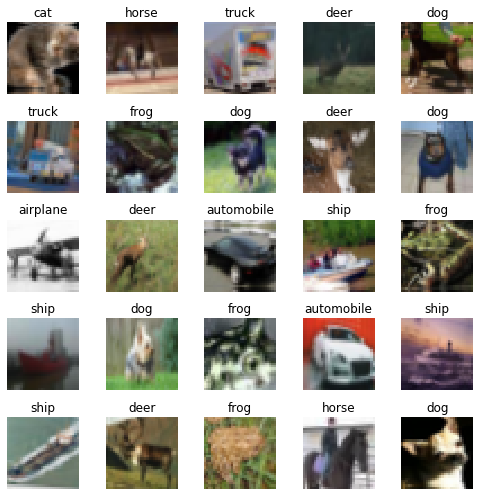

In [14]:
data.show_batch(rows=5, figsize=(7,7))

In [15]:
print(data.classes)
len(data.classes), data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

In [16]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jupyter/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 191MB/s]


In [17]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.655576,1.475065,0.516800,02:13
1,1.319140,1.171494,0.422900,02:08
2,1.115014,1.020314,0.362700,02:09
3,1.100415,1.014855,0.359500,02:12


In [19]:
learn.save('stage-1')

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

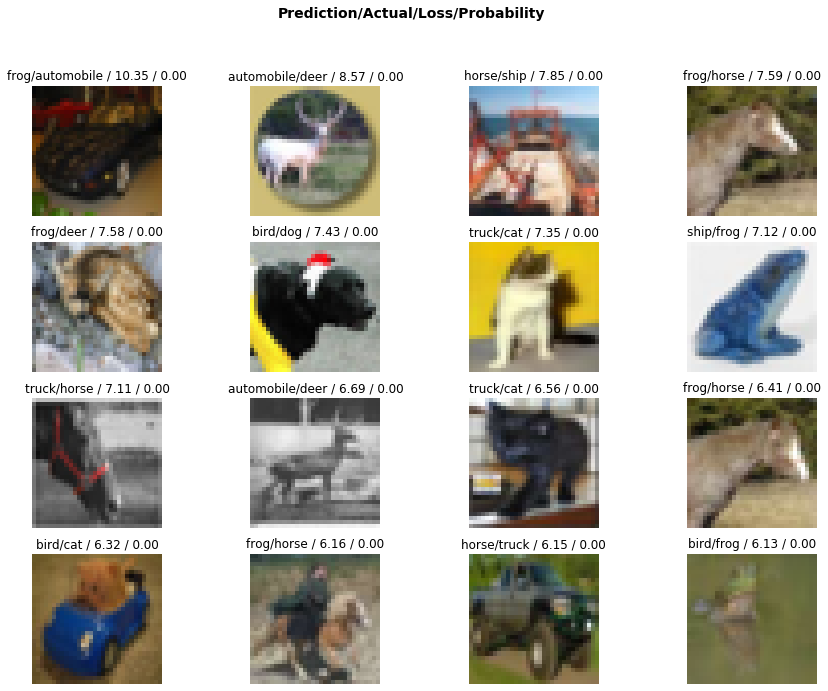

In [21]:
interp.plot_top_losses(16, figsize=(15,11))

In [22]:
doc(interp.plot_top_losses)

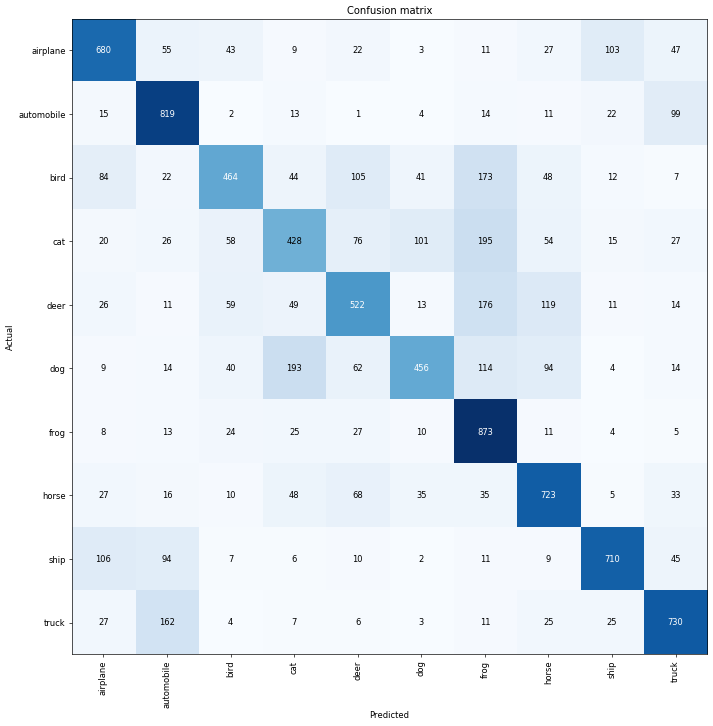

In [23]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
interp.most_confused(min_val=2)

[('cat', 'frog', 195),
 ('dog', 'cat', 193),
 ('deer', 'frog', 176),
 ('bird', 'frog', 173),
 ('truck', 'automobile', 162),
 ('deer', 'horse', 119),
 ('dog', 'frog', 114),
 ('ship', 'airplane', 106),
 ('bird', 'deer', 105),
 ('airplane', 'ship', 103),
 ('cat', 'dog', 101),
 ('automobile', 'truck', 99),
 ('dog', 'horse', 94),
 ('ship', 'automobile', 94),
 ('bird', 'airplane', 84),
 ('cat', 'deer', 76),
 ('horse', 'deer', 68),
 ('dog', 'deer', 62),
 ('deer', 'bird', 59),
 ('cat', 'bird', 58),
 ('airplane', 'automobile', 55),
 ('cat', 'horse', 54),
 ('deer', 'cat', 49),
 ('bird', 'horse', 48),
 ('horse', 'cat', 48),
 ('airplane', 'truck', 47),
 ('ship', 'truck', 45),
 ('bird', 'cat', 44),
 ('airplane', 'bird', 43),
 ('bird', 'dog', 41),
 ('dog', 'bird', 40),
 ('horse', 'dog', 35),
 ('horse', 'frog', 35),
 ('horse', 'truck', 33),
 ('airplane', 'horse', 27),
 ('cat', 'truck', 27),
 ('frog', 'deer', 27),
 ('horse', 'airplane', 27),
 ('truck', 'airplane', 27),
 ('cat', 'automobile', 26),
 ('d

In [25]:
learn.unfreeze()

In [26]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.690780,0.586125,0.202900,02:17


In [27]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: /home/jupyter/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: /home/jupyter/.fastai/data/cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Batc

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


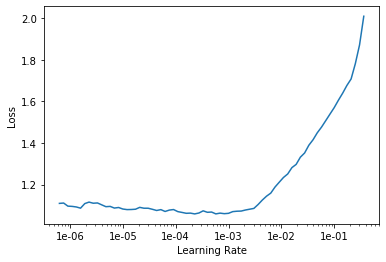

In [29]:
learn.recorder.plot()

In [30]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.000439,0.926564,0.328000,02:17
1,0.974619,0.891397,0.313100,02:18


In [31]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid ='test',
                                  size=299, bs = bs//2).normalize(imagenet_stats)

In [32]:
learn = cnn_learner(data, models.resnet50, metrics= error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jupyter/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 33.1MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


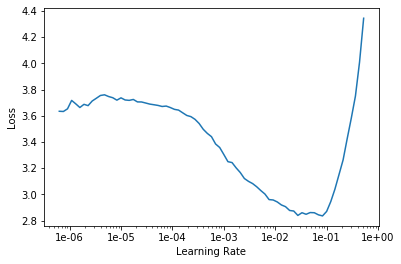

In [33]:
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.677175,0.424671,0.144700,06:24
1,0.387875,0.256036,0.087600,06:22
2,0.315617,0.192427,0.063500,06:22
3,0.232398,0.167858,0.057600,06:22
4,0.213892,0.158816,0.053800,06:22
5,0.158772,0.141501,0.049900,06:22
6,0.172636,0.132514,0.046000,06:22
7,0.145824,0.131664,0.046700,06:22


In [36]:
learn.save('stage-1-50')

In [37]:
learn.unfreeze()
learn.fit_one_cycle(3,max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.174299,0.127631,0.043300,08:44
1,0.125218,0.121226,0.041900,08:43
2,0.102956,0.114788,0.040100,08:43


In [38]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: /home/jupyter/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: /home/jupyter/.fastai/data/cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): 

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

In [40]:
interp.most_confused(min_val=2)

[('cat', 'dog', 73),
 ('dog', 'cat', 42),
 ('truck', 'automobile', 23),
 ('automobile', 'truck', 20),
 ('bird', 'cat', 18),
 ('ship', 'airplane', 16),
 ('horse', 'deer', 15),
 ('bird', 'deer', 14),
 ('cat', 'frog', 14),
 ('cat', 'deer', 13),
 ('horse', 'dog', 13),
 ('airplane', 'ship', 11),
 ('bird', 'airplane', 10),
 ('cat', 'bird', 10),
 ('deer', 'horse', 9),
 ('dog', 'deer', 9),
 ('dog', 'horse', 9),
 ('deer', 'bird', 8),
 ('frog', 'cat', 8),
 ('bird', 'dog', 7),
 ('bird', 'frog', 7),
 ('airplane', 'bird', 6),
 ('deer', 'cat', 6),
 ('frog', 'deer', 6),
 ('horse', 'cat', 6),
 ('truck', 'airplane', 6),
 ('deer', 'dog', 5),
 ('dog', 'bird', 5),
 ('airplane', 'truck', 4),
 ('cat', 'horse', 4),
 ('deer', 'airplane', 4),
 ('deer', 'frog', 4),
 ('frog', 'airplane', 4),
 ('ship', 'automobile', 4),
 ('airplane', 'automobile', 3),
 ('airplane', 'deer', 3),
 ('automobile', 'ship', 3),
 ('bird', 'horse', 3),
 ('frog', 'bird', 3),
 ('horse', 'airplane', 3),
 ('horse', 'bird', 3),
 ('ship', 'bird